In [17]:
import json

f = open("../test_log/test_result.json", 'r')
test_result = json.load(f)
list(test_result.items())[0]

('nums_1000_0',
 [{'sorted': True, 'time': 0.09134888648986816, 'function': 'bubble_sort'},
  {'sorted': True, 'time': 0.04783916473388672, 'function': 'insertion_sort'},
  {'sorted': True, 'time': 0.0023086071014404297, 'function': 'heap_sort'},
  {'sorted': True, 'time': 0.001583099365234375, 'function': 'quick_sort'},
  {'sorted': True,
   'time': 0.0018413066864013672,
   'function': 'quick_sort_pivot_rand'},
  {'sorted': True,
   'time': 0.0015747547149658203,
   'function': 'quick_sort_pivot_median'}])

In [18]:
def extract_test_num(s:str):
    l = s.split("_")
    return (int(l[1]), int(l[2]))

extract_test_num("nums_20000_3")

(20000, 3)

In [25]:
dict = {}

for key, value in test_result.items():
    (size, idx) = extract_test_num(key)
    for item in value:
        function = item["function"]
        time = item["time"]
        if not function in dict:
            dict[function] = {}
        if not size in dict[function]:
            dict[function][size] = []
        dict[function][size].append(time)
list(dict.items())[0]

('bubble_sort',
 {1000: [0.09134888648986816,
   0.08934235572814941,
   0.08831119537353516,
   0.08806967735290527,
   0.08976483345031738],
  10000: [9.483323335647583,
   9.9171724319458,
   9.290271043777466,
   9.21159839630127,
   9.301311731338501],
  20000: [38.05912899971008,
   40.366849422454834,
   37.96301984786987,
   40.7431857585907,
   39.81986880302429]})

In [91]:
from matplotlib import pyplot as plt

def plot_function(ax, function, dict, function_name=None, should_annotate=False):
    value = dict[function]
    sizes = [*value]
    averages = []
    for l in value.values():
        average = sum(l)/len(l)
        averages.append(average)
    if function_name == None: function_name = function
    ax.plot(sizes, averages, label=function_name, marker='o')
    if should_annotate:
        for i, average in enumerate(averages):
            ax.annotate(average, (sizes[i], average))



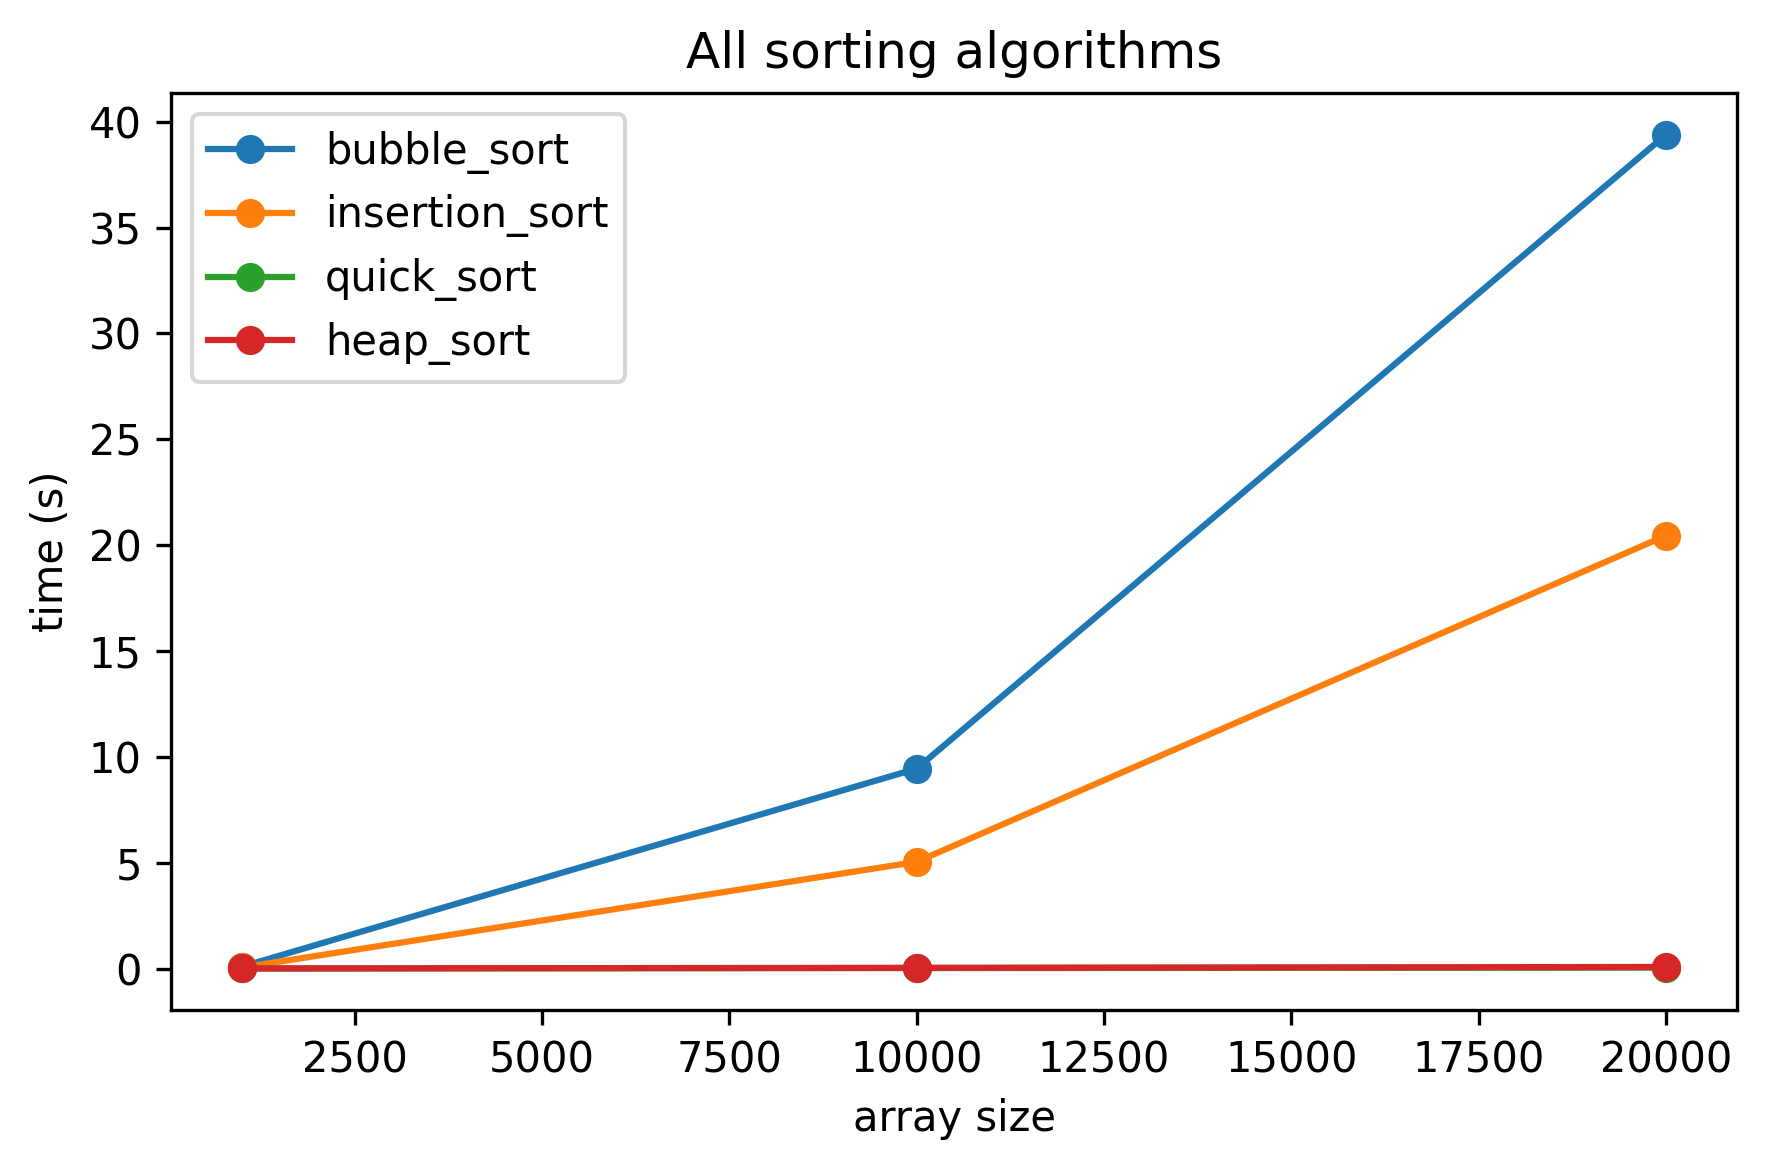

In [108]:
fig, ax = plt.subplots()
fig.set_dpi(300)

plot_function(ax, "bubble_sort", dict)
plot_function(ax, "insertion_sort", dict)
plot_function(ax, "quick_sort", dict)
plot_function(ax, "heap_sort", dict)

ax.legend(loc='best')
ax.set_title("All sorting algorithms")
ax.set_xlabel("array size")
ax.set_ylabel("time (s)")

fig.tight_layout()
fig.show()
fig.savefig("all_sorts.png", dpi=fig.dpi)


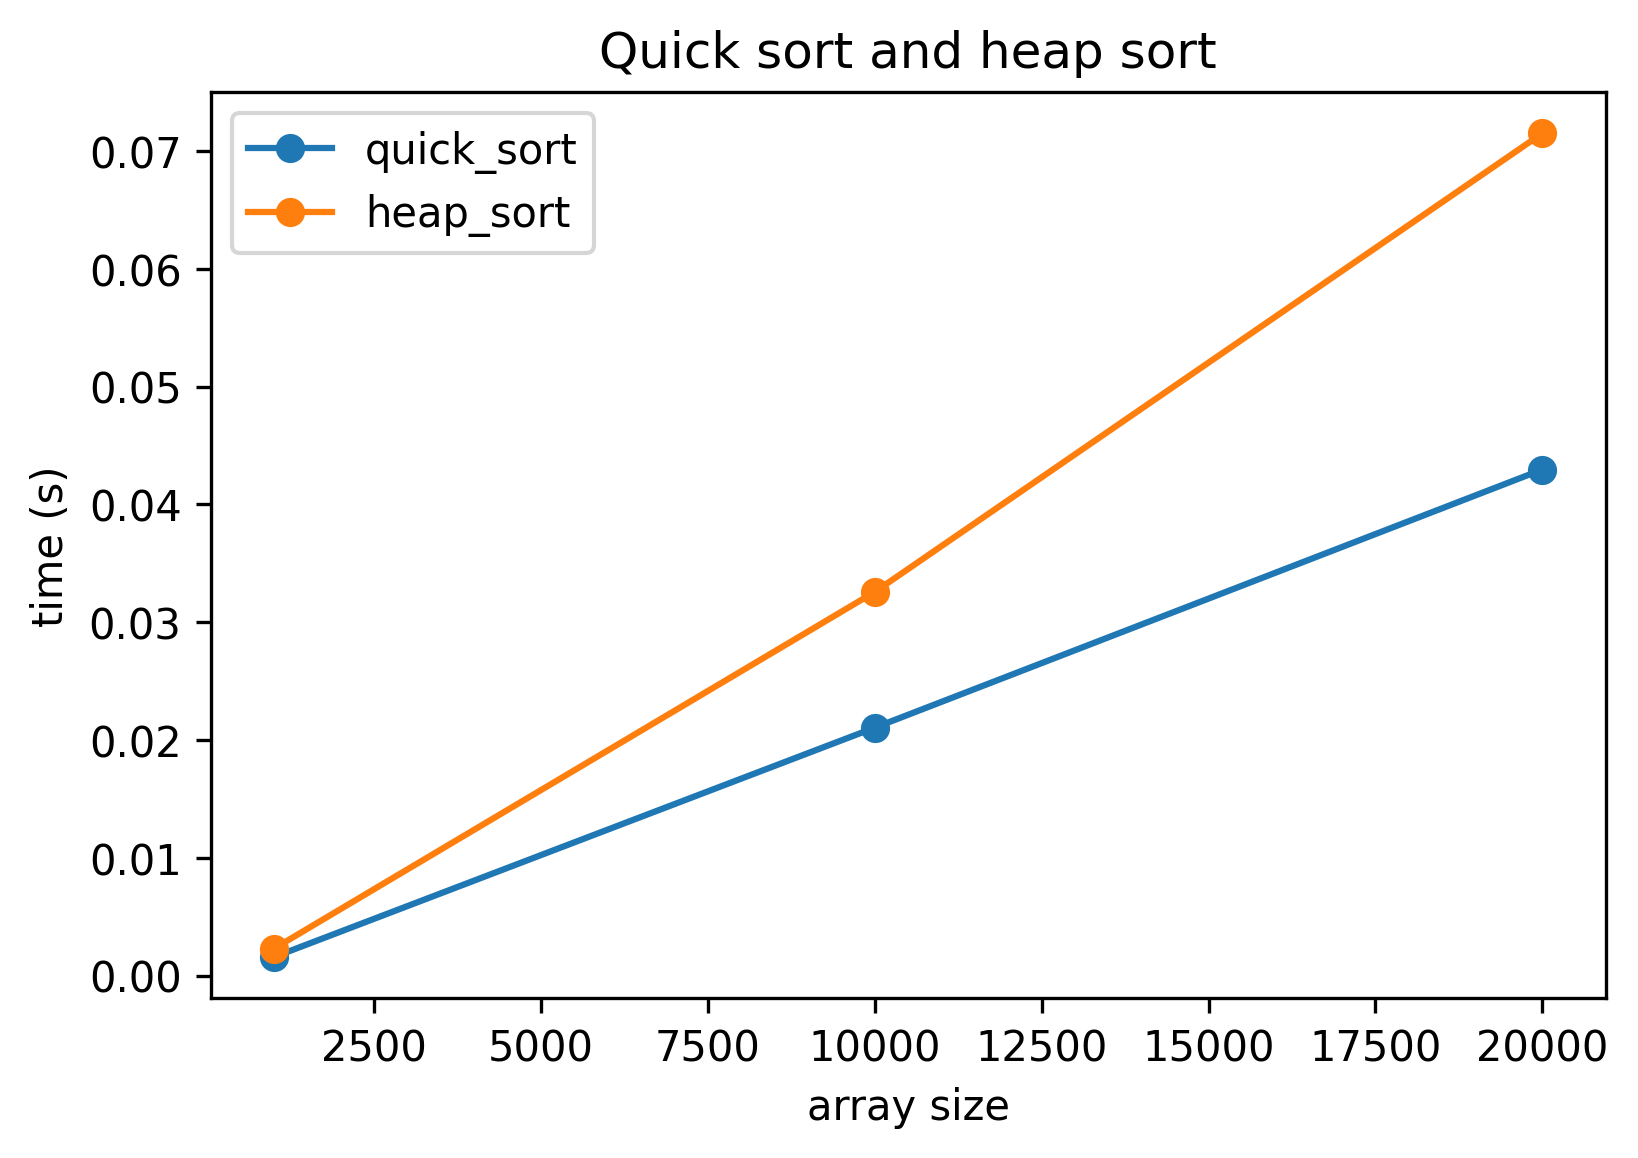

In [109]:
fig, ax = plt.subplots()
fig.set_dpi(300)

plot_function(ax, "quick_sort", dict)
plot_function(ax, "heap_sort", dict)

ax.set_title("Quick sort and heap sort")

ax.legend(loc='best')
ax.set_xlabel("array size")
ax.set_ylabel("time (s)")

fig.show()
fig.savefig("quick_heap.png", dpi=fig.dpi)

In [ ]:
fig, ax = plt.subplots()
fig.set_dpi(300)

plot_function(ax, "quick_sort", dict, "quick_sort_pivot_last")
plot_function(ax, "quick_sort_pivot_rand", dict)
plot_function(ax, "quick_sort_pivot_median", dict)

ax.set_title("Quick sort with different pivots")

ax.legend(loc='best')
ax.set_xlabel("array size")
ax.set_ylabel("time (s)")

fig.show()
fig.savefig("quick_diff_pivots.png", dpi=fig.dpi)